In [38]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from varname import nameof
import math

In [2]:
plt.style.use('seaborn')

In [224]:
class Options:
    def __init__(self, ticker, expiration, action, strike, premium):
        exp_date = datetime.strptime(expiration, '%Y-%m-%d')
        exp_date_yr = exp_date.year
        exp_date_mon = exp_date.month
        exp_date_day = exp_date.day
        if exp_date_mon < 10:
            exp_date_mon = '0' + str(exp_date_mon)
        if exp_date_day < 10:
            exp_date_day = '0' + str(exp_date_day)
        
        self.ticker = ticker
        self.expiration = expiration
        self.exp_date_trans = str(exp_date_yr)[-2:] + str(exp_date_mon) + str(exp_date_day)
        self.action = action
        self.strike = strike
        self.premium = premium
        self.payoff = [] 
        self.breakeven = 0
        
        if action == 'buy':
            self.cost = premium
        elif action == 'sell':
            self.cost = -premium
        
#     def graph(self, max_price=100):
# #         self.calc_payoff(max_price)
#         x = np.arange(0, max_price+1, 1)
#         y = self.payoff
        
#         plt.xlabel('Stock Price at Expiration')
#         plt.ylabel('Payoff')
#         plt.xticks(np.arange(min(x), max(x)+10, 10))
#         plt.yticks(np.arange(-100, 100, 10))
#         plt.legend(loc = 'upper left')
#         plt.plot(x, y, label = self.name)
        
    def calc_payoff(self, max_price=100):
        for i in range (0, max_price+1):
            earn = self.calc_profit(i)
            self.payoff.append(earn)
            if earn == 0:
                self.breakeven = i
    
#     def calc_return(self):
#         return (["{:.2%} ,{:.2%}" )
#                .format(str(min(self.payoff)/self.cost),
#                        str(max(self.payoff)/self.cost)
#                       )

In [225]:
class Call(Options):
    def __init__(self, ticker, expiration, action, strike, premium, max_price=100):
        super().__init__(ticker, expiration, action, strike, premium)
        self.name = self.ticker + self.exp_date_trans + 'C'+ str(self.strike)
        self.calc_payoff(max_price)
        
    def calc_profit(self, price):
        if self.action == 'buy':
            if price <= self.strike:
                profit =  -self.premium
            elif price > self.strike:
                profit = price - self.strike - self.premium
            
        elif self.action == 'sell':
            if price <= self.strike:
                profit = self.premium
            elif price > self.strike:
                profit = - price + self.strike + self.premium
                
        return profit
      

In [226]:
class Put(Options):
    def __init__(self, ticker, expiration, action, strike, premium, max_price=100):
        super().__init__(ticker, expiration, action, strike, premium)
        self.name = self.ticker + self.exp_date_trans + 'P'+ str(self.strike)
        self.calc_payoff(max_price)
        
    def calc_profit(self, price):
        if self.action == 'buy':
            if price <= self.strike:
                profit = self.strike - price - self.premium
            elif price > self.strike:
                profit = - self.premium
            
        elif self.action == 'sell':
            if price <= self.strike:
                profit = - self.strike + price + self.premium
            elif price > self.strike:
                profit = self.premium
        return profit
            

In [264]:
def create_graph(name, payoff, cost, max_x=100, max_y=100):

    x = np.arange(0, max_x+1, 1)
    y = payoff
    
    try: breakeven = list(payoff).index(0)
    except: 
        minimum = min(payoff, key = abs)
        breakeven = list(payoff).index(minimum)
    
    
    payoff_min = round(min(payoff),1)
    payoff_max = round(max(payoff),1)
    breakeven = round(breakeven,1)
    cost = round(cost,1)
    return_min = round(payoff_min/cost,1)
    return_max = round(payoff_max/cost,1)
    
    print('Strategy:', name, 
          ';Payoff Range:[', payoff_min, ',', payoff_max, 
          '];Breakeven Price:', breakeven,
          ';Cost:', cost,
           ';Return Range:[', "{:.0%}".format(return_min), ',', "{:.0%}".format(return_max), ']'
         )
    plt.xlabel('Stock Price at Expiration')
    plt.ylabel('Payoff')
    plt.xticks(np.arange(0, max_x+10, 10))
    plt.yticks(np.arange(-max_y, max_y+10, 10))
#     plt.legend(loc = 'upper left')
    plt.plot(x, y, label = name )
    plt.legend()

In [265]:
def create_graph_stock_only(current_price, max_x=100, max_y=100):
    x = np.arange(0, max_x+1, 1)
    y = [a - current_price for a in x]
    
    payoff_min = min(x) - current_price
    payoff_max = max(x) - current_price
    cost = current_price
    return_min = round(payoff_min/cost,1)
    return_max = round(payoff_max/cost,1)
    
    print('Strategy:Stock Only', 
          ';Payoff Range:[', payoff_min, ',', payoff_max, 
          '];Breakeven Price:', current_price,
          'Cost:', cost,
          ';Return Range:[', "{:.0%}".format(return_min), ',', "{:.0%}".format(return_max), ']'
         )
    plt.xticks(np.arange(0, max_x+10, 10))
    plt.yticks(np.arange(-max_y, max_y+10, 10))
#     plt.legend(loc = 'upper left')
    plt.plot(x, y, label = 'Stock Only' )
    plt.legend()

In [121]:
c20 = Call('NIO', '2021-01-15', 'buy', 20, 5)

In [122]:
c20.calc_profit(21)

-4

Strategy: NIO250102C20 ; Payoff Range: [ -5 ,  75 ]; Breakeven Price:  25 Cost:  5
Strategy: NIO200310C50 ; Payoff Range: [ -45 ,  5 ]; Breakeven Price:  55 Cost:  -5
Strategy: NIO250105P30 ; Payoff Range: [ -2 ,  28 ]; Breakeven Price:  28 Cost:  2
Strategy: NIO250105P60 ; Payoff Range: [ -52 ,  8 ]; Breakeven Price:  52 Cost:  -8
Strategy: Stock Only ; Payoff Range: [ -60 ,  40 ]; Breakeven Price:  60 Cost:  60


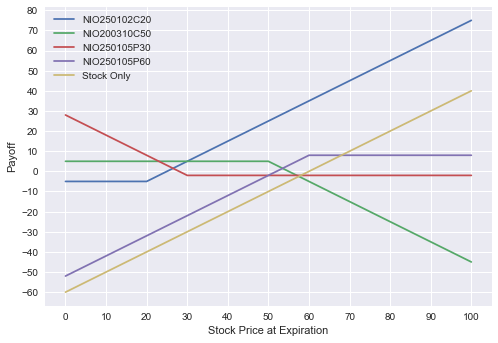

In [236]:
bc20 = Call('NIO', '2025-01-02', 'buy', 20, 5)
sc50 = Call('NIO', '2020-03-10', 'sell', 50, 5)
bp30 = Put('NIO', '2025-01-05', 'buy', 30, 2)
sp60 = Put('NIO', '2025-01-05', 'sell', 60, 8)

create_graph(bc20.name, bc20.payoff, bc20.cost)
create_graph(sc50.name, sc50.payoff, sc50.cost)
create_graph(bp30.name, bp30.payoff, bp30.cost)
create_graph(sp60.name, sp60.payoff, sp60.cost)
create_graph_stock_only(60)


In [154]:
bc20_sc50 = np.add(bc20.payoff, sc50.payoff)
sc50_sp60 = np.add(sc50.payoff, sp60.payoff)

Strategy: bc20_sc50 ; Payoff Range: [ 0 ,  30 ]; Breakeven Price:  0
Strategy: sc50_sp60 ; Payoff Range: [ -47 ,  3 ]; Breakeven Price:  47


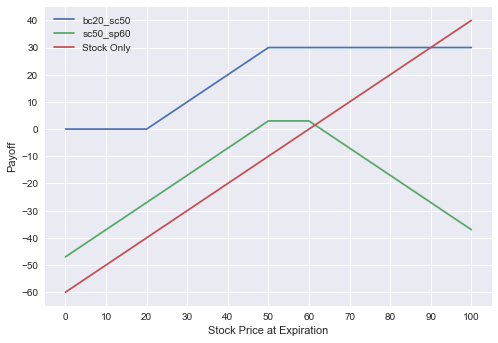

In [194]:
create_graph('bc20_sc50', st1_bc20_sc50)
create_graph('sc50_sp60', st2_sc50_sp60)
create_graph_stock_only(60)

Strategy: bc50_sc80 ; Payoff Range: [ -5 ,  25 ]; Breakeven Price:  55


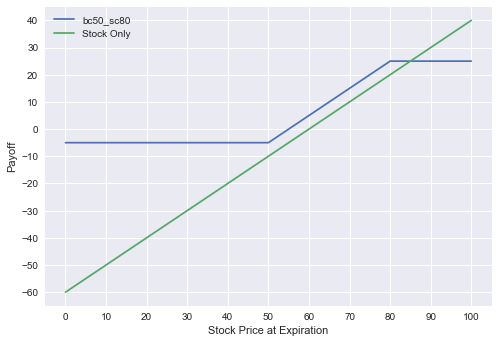

In [195]:
# Bull Spread Strategy: buy call 50 and sell call 80

bc50 = Call('NIO', '2021-05-01', 'buy', 50, 20)
sc80 = Call('NIO', '2021-05-01', 'sell', 80, 15)

bc50_sc80 = np.add(bc50.payoff, sc80.payoff)

create_graph('bc50_sc80', bc50_sc80)
create_graph_stock_only(60)

Strategy: bc50_sc80 ; Payoff Range: [ -35 ,  15 ]; Breakeven Price:  15


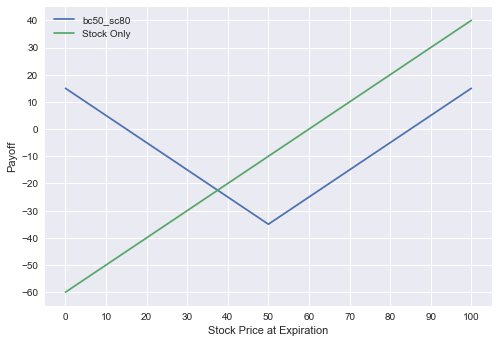

In [196]:
# Straddle Strategy: buy call 50 and buy put 50

bc50 = Call('NIO', '2021-05-01', 'buy', 50, 20)
bp50 = Put('NIO', '2021-05-01', 'buy', 50, 15)

bc50_sc80 = np.add(bc50.payoff, bp50.payoff)

create_graph('bc50_sc80', bc50_sc80)
create_graph_stock_only(60)

Strategy: bc50_sc80_bc70 ; Payoff Range: [ -5 ,  5 ]; Breakeven Price:  55


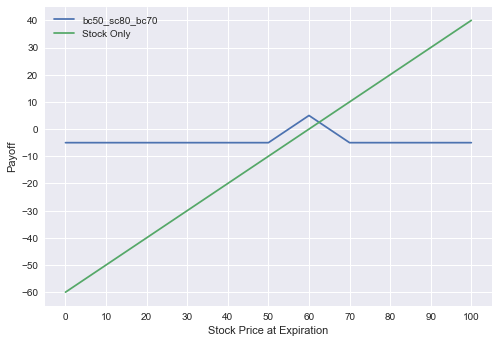

In [197]:
# Butterfly Spread Strategy: buy 1 call 50, sell 2 call 60, and buy a call 70

bc50 = Call('NIO', '2021-05-01', 'buy', 50, 10)
sc50 = Call('NIO', '2021-05-01', 'sell', 60, 15)
bc70 = Call('NIO', '2021-05-01', 'buy', 70, 25)

bc50_sc80_bc70 = np.add(np.add(bc50.payoff, bc70.payoff), 2*np.array(sc50.payoff))

create_graph('bc50_sc80_bc70', bc50_sc80_bc70)
create_graph_stock_only(60)

Strategy: nio_bc3_bp5 ; Payoff Range: [ -57.0 ,  138.0 ]; Breakeven Price:  62
Strategy: Stock Only ; Payoff Range: [ -60 ,  140 ]; Breakeven Price:  60


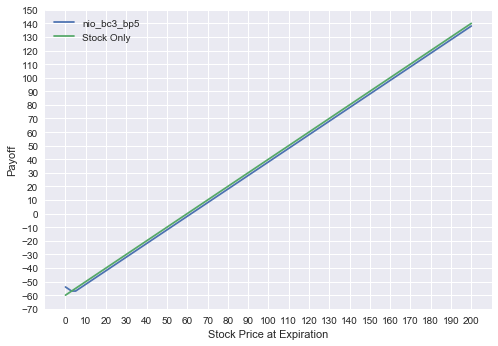

In [218]:
# Stragegy: buy call @3 and buy put @5

nio_bc3 = Call('NIO', '2023-01-20', 'buy', 3, 58.38, max_price=200)
nio_bp5 = Put('NIO', '2023-01-20', 'buy', 5, 0.59, max_price=200)

nio_bc3_bp5 = np.add(nio_bc3.payoff, nio_bp5.payoff)

create_graph('nio_bc3_bp5', nio_bc3_bp5, max_x=200, max_y=200)
create_graph_stock_only(60, max_x=200, max_y=200)

In [273]:
def combine_options(options):
    combined_payoff = None
    combined_cost = 0
    
    for option in options:
        if combined_payoff == None:
            combined_payoff = option.payoff
        else:
            combined_payoff = np.add(option.payoff, combined_payoff)
        combined_cost+= option.cost
    return combined_payoff, combined_cost

Strategy: nio_bc3_bp5 ;Payoff Range:[ -57.0 , 138.0 ];Breakeven Price: 62 ;Cost: 59.0 ;Return Range:[ -100% , 230% ]
Strategy: nio_bc3_sp45 ;Payoff Range:[ -84.9 , 157.1 ];Breakeven Price: 44 ;Cost: 39.9 ;Return Range:[ -210% , 390% ]
Strategy: nio_bc3_sp60 ;Payoff Range:[ -88.9 , 168.1 ];Breakeven Price: 46 ;Cost: 28.9 ;Return Range:[ -310% , 580% ]
Strategy: nio_bc3_sp70 ;Payoff Range:[ -91.1 , 175.9 ];Breakeven Price: 47 ;Cost: 21.1 ;Return Range:[ -430% , 830% ]
Strategy: nio_bc3_sp80 ;Payoff Range:[ -93.9 , 183.1 ];Breakeven Price: 48 ;Cost: 13.9 ;Return Range:[ -680% , 1320% ]
Strategy: nio_bc3_sp85 ;Payoff Range:[ -98.4 , 183.6 ];Breakeven Price: 51 ;Cost: 13.4 ;Return Range:[ -730% , 1370% ]
Strategy: nio_bc3_sp100 ;Payoff Range:[ -97.3 , 199.7 ];Breakeven Price: 50 ;Cost: -2.7 ;Return Range:[ 3600% , -7400% ]
Strategy:Stock Only ;Payoff Range:[ -60 , 140 ];Breakeven Price: 60 Cost: 60 ;Return Range:[ -100% , 230% ]


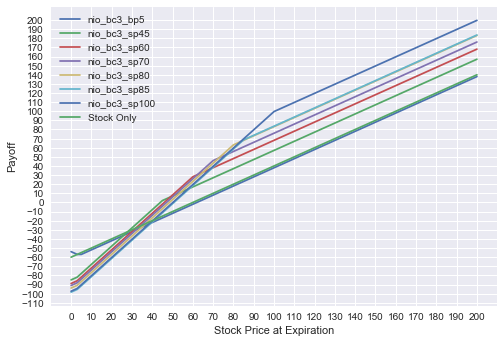

In [279]:
# Stragegy 1: buy call @3 and buy put @5
# Stragegy 2: buy call @3 and sell put @60
# Stragegy 3: buy call @3 and sell put @80

nio_bc3 = Call('NIO', '2023-01-20', 'buy', 3, 58.38, max_price=200)
nio_bp5 = Put('NIO', '2023-01-20', 'buy', 5, 0.59, max_price=200)
nio_sp45 = Put('NIO', '2023-01-20', 'sell', 45, 18.45, max_price=200)
nio_sp60 = Put('NIO', '2023-01-20', 'sell', 60, 29.5, max_price=200)
nio_sp70 = Put('NIO', '2023-01-20', 'sell', 70, 37.3, max_price=200)
nio_sp80 = Put('NIO', '2023-01-20', 'sell', 80, 44.5, max_price=200)
nio_sp85 = Put('NIO', '2023-01-20', 'sell', 85, 45, max_price=200)
nio_sp100 = Put('NIO', '2023-01-20', 'sell', 100, 61.05, max_price=200)

s1_payoff, s1_cost = combine_options([nio_bc3, nio_bp5])
s2_payoff, s2_cost = combine_options([nio_bc3, nio_sp45])
s3_payoff, s3_cost = combine_options([nio_bc3, nio_sp60])
s4_payoff, s4_cost = combine_options([nio_bc3, nio_sp70])
s5_payoff, s5_cost = combine_options([nio_bc3, nio_sp80])
s6_payoff, s6_cost = combine_options([nio_bc3, nio_sp85])
s7_payoff, s7_cost = combine_options([nio_bc3, nio_sp100])


create_graph('nio_bc3_bp5',   s1_payoff, s1_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp45',  s2_payoff, s2_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp60',  s3_payoff, s3_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp70',  s4_payoff, s4_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp80',  s5_payoff, s5_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp85',  s6_payoff, s6_cost,  max_x=200, max_y=200)
create_graph('nio_bc3_sp100', s7_payoff, s7_cost,  max_x=200, max_y=200)

create_graph_stock_only(60, max_x=200, max_y=200)

In [ ]:
nio_bc3_bp5_cost = np.add(nio_bc3.cost, nio_bp5.cost)
nio_bc3_sp45_cost = np.add(nio_bc3.cost, nio_sp45.cost)
nio_bc3_sp60_cost = np.add(nio_bc3.cost, nio_sp60.cost)
nio_bc3_sp85_cost = np.add(nio_bc3.cost, nio_sp85.cost)